# Exercise 1

Question: 
Implement the gradient descent algorithm to find the minimum of the following 
function:

$$f(x)=x^2+4x+5$$

1. Define a Python function to compute the value of f(x) and its 
derivative f′(x). 

2. Implement gradient descent starting from an initial value $x_0=1$ and a 
learning rate $\alpha=0.1$. 

3. Perform at least 20 iterations and show how the value of x converges to the 
minimum. 

4. Plot the function f(x) and the points obtained in each iteration to visualize 
the convergence.

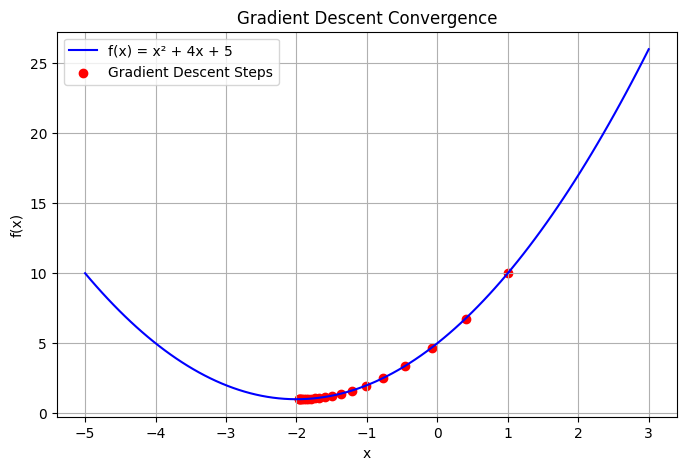

Solution found: -1.9654123548617946


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learning_rate=0.1, n_iter=20, tol=1e-6):
    """
    Perform Gradient Descent to minimize a function.

    Parameters:
        gradient (function): The gradient function of the objective function.
        start (float): The initial point to start the optimization.
        learning_rate (float): The step size for each iteration.
        n_iter (int): The maximum number of iterations.
        tol (float): The tolerance for stopping criteria.

    Returns:
        list: The sequence of x values at each iteration.
    """
    x = start  # Initialize the starting point
    history = [x]  # Store x values for visualization
    
    for _ in range(n_iter):
        grad = gradient(x)  # Compute the gradient at the current point
        if np.abs(grad) < tol:  # Check if the gradient is close to zero (stopping condition)
            break
        x = x - learning_rate * grad  # Update x using the gradient
        history.append(x)  # Store updated x
    
    return history

# Define the function and its derivative
def f(x):
    return x**2 + 4*x + 5

def grad_f(x):
    return 2*x + 4

# Run Gradient Descent with x0 = 1
start = 1.0
x_values = gradient_descent(grad_f, start, learning_rate=0.1, n_iter=20)

# Generate plot
x_range = np.linspace(-5, 3, 100)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_range, label="f(x) = x² + 4x + 5", color='blue')
plt.scatter(x_values, [f(x) for x in x_values], color='red', label="Gradient Descent Steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.grid()
plt.show()

# Print final solution
print("Solution found:", x_values[-1])

# Exercise 2: 

You will implement a knowledge-based system in Python to solve the three cases. 
The system must take as input a set of facts and logical rules to determine whether 
the defendant is guilty or innocent. 

You will then extend the system to allow for an appeal, where new evidence can be 
added and the system updates its verdict. 

You will need to explain in a comment or accompanying document what formalism 
you used to address the problem (e.g. propositional logic, first-order logic, production 
rules, etc.) and why you chose it. 

The code should be well commented and organized. 

Case 1: The Mansion Murder 

Crime Description: 

 Crime: Murder of the owner of a mansion. 

 Accused: The butler. 

 Reason for Guilt: 

o The butler was seen near the crime scene. 

o A knife with his fingerprints was found. 

o The butler had a debt with the victim. 

 Initial Verdict: Guilty. 

Appeal: 

 New Evidence: 

o A security video shows the butler was in another room at the time of the crime. 

o The fingerprints on the knife do not match the butler’s. 

 Expected Result: Innocent. 

In [7]:
class DefaultLogic:
    def __init__(self):
        self.facts = set()  # Known facts
        self.exceptions = set()  # Exceptions

    def add_fact(self, fact):
        """Adds a fact to the knowledge base."""
        self.facts.add(fact)

    def add_exception(self, exception):
        """Adds an exception that overrides default rules."""
        self.exceptions.add(exception)

    def infer(self, rule):
        """Performs inference using default logic."""
        try:
            if not isinstance(rule, tuple) or len(rule) != 3:
                raise ValueError("Rule must be a tuple: (prerequisite, assumption, conclusion)")
            
            prereq, assumption, conclusion = rule
            if not isinstance(prereq, str) or not isinstance(assumption, str) or not isinstance(conclusion, str):
                raise TypeError("All rule elements must be strings")
            
            if prereq in self.facts and assumption not in self.exceptions:
                return conclusion  # The default assumption holds
            return "Undetermined"
        except Exception as e:
            return f"Error: {str(e)}"

# --- Initialize Default Logic System ---
logic = DefaultLogic()

# --- Known Facts ---
logic.add_fact("butler_seen_near_crime")
logic.add_fact("knife_with_fingerprints")
logic.add_fact("butler_had_debt")

# --- Default Guilt Rule ---
guilt_rule = ("butler_seen_near_crime", "no_coartada", "guilty")

# --- Initial Verdict ---
initial_verdict = logic.infer(guilt_rule)
print("Initial Verdict:", initial_verdict)  # Expected: Guilty

# --- Appeal: Adding New Evidence ---
logic.add_exception("no_coartada")  # Coartada found
logic.add_exception("knife_with_fingerprints")  # Fingerprints don't match

# --- Innocence Rule ---
innocence_rule = ("video_proves_coartada", "knife_fingerprints_different", "innocent")
logic.add_fact("video_proves_coartada")
logic.add_fact("knife_fingerprints_different")

# --- Re-evaluate Verdict ---
final_verdict = logic.infer(innocence_rule)
print("Final Verdict after Appeal:", final_verdict)  # Expected: Innocent


Initial Verdict: guilty
Final Verdict after Appeal: innocent


For this knowledge-based system, Default Logic was chosen because it allows us to make reasonable assumptions unless counter-evidence (exceptions) is provided. In our case we have the facts that make us to choose the guilty or innonce, and guilty is inferred based on available facts like default logic.

In [8]:
class DefaultLogic:
    def __init__(self):
        self.facts = set()  # Known facts
        self.exceptions = set()  # Exceptions

    def add_fact(self, fact):
        """Adds a fact to the knowledge base."""
        self.facts.add(fact)

    def add_exception(self, exception):
        """Adds an exception that overrides default rules."""
        self.exceptions.add(exception)

    def infer(self, rule):
        """Performs inference using default logic."""
        try:
            if not isinstance(rule, tuple) or len(rule) != 3:
                raise ValueError("Rule must be a tuple: (prerequisite, assumption, conclusion)")
            
            prereq, assumption, conclusion = rule
            if not isinstance(prereq, str) or not isinstance(assumption, str) or not isinstance(conclusion, str):
                raise TypeError("All rule elements must be strings")
            
            if prereq in self.facts and assumption not in self.exceptions:
                return conclusion  # The default assumption holds
            return "Undetermined"
        except Exception as e:
            return f"Error: {str(e)}"

# --- Initialize the Knowledge Base ---
logic = DefaultLogic()

# --- Known Facts (Evidence for Guilt) ---
logic.add_fact("former_employee")
logic.add_fact("had_bank_blueprints")
logic.add_fact("witness_saw_near_bank")
logic.add_fact("stolen_money_found")

# --- Default Guilt Rule ---
guilt_rule = ("former_employee", "no_counter_evidence", "guilty")

# --- Initial Verdict ---
initial_verdict = logic.infer(guilt_rule)
print("Initial Verdict:", initial_verdict)  # Expected: Guilty

# --- Appeal: Adding New Evidence ---
logic.add_exception("witness_saw_near_bank")  # Witness admitted a mistake
logic.add_exception("stolen_money_found")  # Money was from inheritance

# --- Innocence Rule ---
innocence_rule = ("witness_mistaken", "money_from_inheritance", "innocent")
logic.add_fact("witness_mistaken")
logic.add_fact("money_from_inheritance")

# --- Re-evaluate Verdict ---
final_verdict = logic.infer(innocence_rule)
print("Final Verdict after Appeal:", final_verdict)  # Expected: Innocent


Initial Verdict: guilty
Final Verdict after Appeal: innocent


Default logic works properly here becasue assumes guilt until counter-evidence is provided and the verdict updates when new evidence appears

In [9]:
class DefaultLogic:
    def __init__(self):
        self.facts = set()  # Known facts
        self.exceptions = set()  # Exceptions

    def add_fact(self, fact):
        """Adds a fact to the knowledge base."""
        self.facts.add(fact)

    def add_exception(self, exception):
        """Adds an exception that overrides default rules."""
        self.exceptions.add(exception)

    def infer(self, rule):
        """Performs inference using default logic."""
        try:
            if not isinstance(rule, tuple) or len(rule) != 3:
                raise ValueError("Rule must be a tuple: (prerequisite, assumption, conclusion)")
            
            prereq, assumption, conclusion = rule
            if not isinstance(prereq, str) or not isinstance(assumption, str) or not isinstance(conclusion, str):
                raise TypeError("All rule elements must be strings")
            
            if prereq in self.facts and assumption not in self.exceptions:
                return conclusion  # The default assumption holds
            return "Undetermined"
        except Exception as e:
            return f"Error: {str(e)}"

# --- Initialize the Knowledge Base ---
logic = DefaultLogic()

# --- Known Facts (Evidence for Guilt) ---
logic.add_fact("driver_speeding")
logic.add_fact("witness_saw_red_light_violation")
logic.add_fact("driver_had_alcohol")

# --- Default Guilt Rule ---
guilt_rule = ("driver_speeding", "no_counter_evidence", "guilty")

# --- Initial Verdict ---
initial_verdict = logic.infer(guilt_rule)
print("Initial Verdict:", initial_verdict)  # Expected: Guilty

# --- Appeal: Adding New Evidence ---
logic.add_exception("witness_saw_red_light_violation")  # Traffic light analysis shows it was green
logic.add_exception("driver_had_alcohol")  # Alcohol level was within legal limit

# --- Innocence Rule ---
innocence_rule = ("traffic_light_green", "alcohol_within_limit", "innocent")
logic.add_fact("traffic_light_green")
logic.add_fact("alcohol_within_limit")

# --- Re-evaluate Verdict ---
final_verdict = logic.infer(innocence_rule)
print("Final Verdict after Appeal:", final_verdict)  # Expected: Innocent


Initial Verdict: guilty
Final Verdict after Appeal: innocent


# Exercise 3
Case1 : Emotion Detection in Text 

Problem Description: 

Develop a system that detects and classifies emotions in text messages using Bayesian techniques. This can be useful for applications such as sentiment analysis in social media or customer support.


In [30]:
import re

# --- Step 1: Define the Prior Probabilities P(E) ---
prior_probabilities = {
    "Happy": 0.4,
    "Sad": 0.3,
    "Angry": 0.3
}

# --- Step 2: Define the Conditional Probabilities P(W|E) ---
conditional_probabilities = {
    "Happy": {"happy": 0.25, "joyful": 0.125, "great": 0.125, "sad": 0.05, "down": 0.03, "angry": 0.02, "mad": 0.01, "frustrated": 0.005},
    "Sad": {"happy": 0.05, "joyful": 0.02, "great": 0.03, "sad": 0.20, "down": 0.125, "angry": 0.03, "mad": 0.02, "frustrated": 0.01},
    "Angry": {"happy": 0.10, "joyful": 0.03, "great": 0.02, "sad": 0.05, "down": 0.02, "angry": 0.15, "mad": 0.125, "frustrated": 0.10}
}

# --- Step 3: Preprocess Input Text ---
def preprocess_text(text):
    """Convert text to lowercase and remove punctuation."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()

# --- Step 4: Apply Bayes' Theorem ---
def classify_emotion(text):
    """Classifies the emotion of the given text using Bayes' Theorem."""
    words = preprocess_text(text)

    # Initialize posterior probabilities with prior probabilities
    posterior_probabilities = {emotion: np.log(prior_probabilities[emotion]) for emotion in prior_probabilities}

    for word in words:
        for emotion in posterior_probabilities:
            if word in conditional_probabilities[emotion]:
                #When I multiply the conditional probabilities of each word given an emotion, the resulting product become very small, which cause numerical underflow or loss of precision in computation, so i use log.
                #logP(E∣W)=logP(W∣E)+logP(E)−logP(W) === Bayes' Theorem
                posterior_probabilities[emotion] += np.log(conditional_probabilities[emotion][word])
            else:
                posterior_probabilities[emotion] += np.log(1e-6)  # Smoothing for unknown words

    # Find the emotion with the highest probability
    predicted_emotion = max(posterior_probabilities, key=posterior_probabilities.get)

    # Calculate actual probability (using exp for inverse log)
    prob = np.exp(posterior_probabilities[predicted_emotion])

    return predicted_emotion, prob, posterior_probabilities

# --- Step 5: User Input ---
while True:
    user_text = input("Enter a text message (or type 'exit' to quit): ")
    if user_text.lower() == "exit":
        break
    emotion, probability, probabilities = classify_emotion(user_text)
    print(f"Predicted Emotion: {emotion}")
    print(f"Probability Score: {probability:.4f}")
    print(f"All Emotion Probabilities: {probabilities}")


Predicted Emotion: Happy
Probability Score: 0.0000
All Emotion Probabilities: {'Happy': np.float64(-73.45957942449525), 'Sad': np.float64(-77.18928087312943), 'Angry': np.float64(-76.09066858446133)}
Predicted Emotion: Angry
Probability Score: 0.0000
All Emotion Probabilities: {'Happy': np.float64(-66.08182051626738), 'Sad': np.float64(-64.98320822759926), 'Angry': np.float64(-60.84804167085691)}


# Exercise 4

In [26]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# --- Step 1: Define Fuzzy Variables ---
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), "Time of Day")
occupancy = ctrl.Antecedent(np.array([0, 1]), "Occupancy")
lighting_intensity = ctrl.Consequent(np.arange(0, 100, 1), "Lighting Intensity")

# --- Step 2: Define Membership Functions ---
time_of_day["Morning"] = fuzz.trimf(time_of_day.universe, [6, 9, 12])
time_of_day["Afternoon"] = fuzz.trimf(time_of_day.universe, [12, 15, 18])
time_of_day["Evening"] = fuzz.trimf(time_of_day.universe, [18, 20, 21])
time_of_day["Night"] = fuzz.trimf(time_of_day.universe, [21, 23, 24])
time_of_day["Night-NextDay"] = fuzz.trimf(time_of_day.universe, [0, 3, 6])

occupancy["Unoccupied"] = fuzz.trimf(occupancy.universe, [0, 0, 1])
occupancy["Occupied"] = fuzz.trimf(occupancy.universe, [0, 1, 1])

lighting_intensity["Off"] = fuzz.trimf(lighting_intensity.universe, [0, 0, 20])
lighting_intensity["Low"] = fuzz.trimf(lighting_intensity.universe, [10, 30, 50])
lighting_intensity["Medium"] = fuzz.trimf(lighting_intensity.universe, [40, 60, 80])
lighting_intensity["High"] = fuzz.trimf(lighting_intensity.universe, [70, 90, 100])

# --- Step 3: Define Fuzzy Rules ---
rule1 = ctrl.Rule(time_of_day["Morning"] & occupancy["Occupied"], lighting_intensity["Medium"])
rule2 = ctrl.Rule(time_of_day["Afternoon"] & occupancy["Occupied"], lighting_intensity["Low"])
rule3 = ctrl.Rule(time_of_day["Evening"] & occupancy["Occupied"], lighting_intensity["High"])
rule4 = ctrl.Rule(time_of_day["Night"] & occupancy["Unoccupied"], lighting_intensity["Off"])
rule5 = ctrl.Rule(time_of_day["Night-NextDay"] & occupancy["Unoccupied"], lighting_intensity["Off"])
# I add this rule to the code works properly.
rule6 = ctrl.Rule(time_of_day["Afternoon"] & occupancy["Unoccupied"], lighting_intensity["Low"])


# --- Step 4: Implement Fuzzy Control System ---
lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
lighting_sim = ctrl.ControlSystemSimulation(lighting_ctrl)

# --- Step 5: Simulate Sensor Data and Get Lighting Output ---
sensor_data = [(7, 1), (13, 0), (19, 1), (23, 0)]

for time, occ in sensor_data:
    lighting_sim.input["Time of Day"] = time
    lighting_sim.input["Occupancy"] = occ
    lighting_sim.compute()
    if 0<=lighting_sim.output['Lighting Intensity']<10:
        Ligth='Off'
    if 10<=lighting_sim.output['Lighting Intensity']<40:
        Ligth='Low lighting'
    if 40<=lighting_sim.output['Lighting Intensity']<70:
        Ligth='Medium lighting'
    if 70<=lighting_sim.output['Lighting Intensity']<=100:
        Ligth=' High lighting'
    if occ == 1:
        occ='Occupied'
    else:
        occ='Unoccupied'
    print(f"At {time}:00, {occ}, Lighting Intensity: {Ligth}")


At 7:00, Occupied, Lighting Intensity: Medium lighting
At 13:00, Unoccupied, Lighting Intensity: Low lighting
At 19:00, Occupied, Lighting Intensity:  High lighting
At 23:00, Unoccupied, Lighting Intensity: Off


### Visualization of membership functions

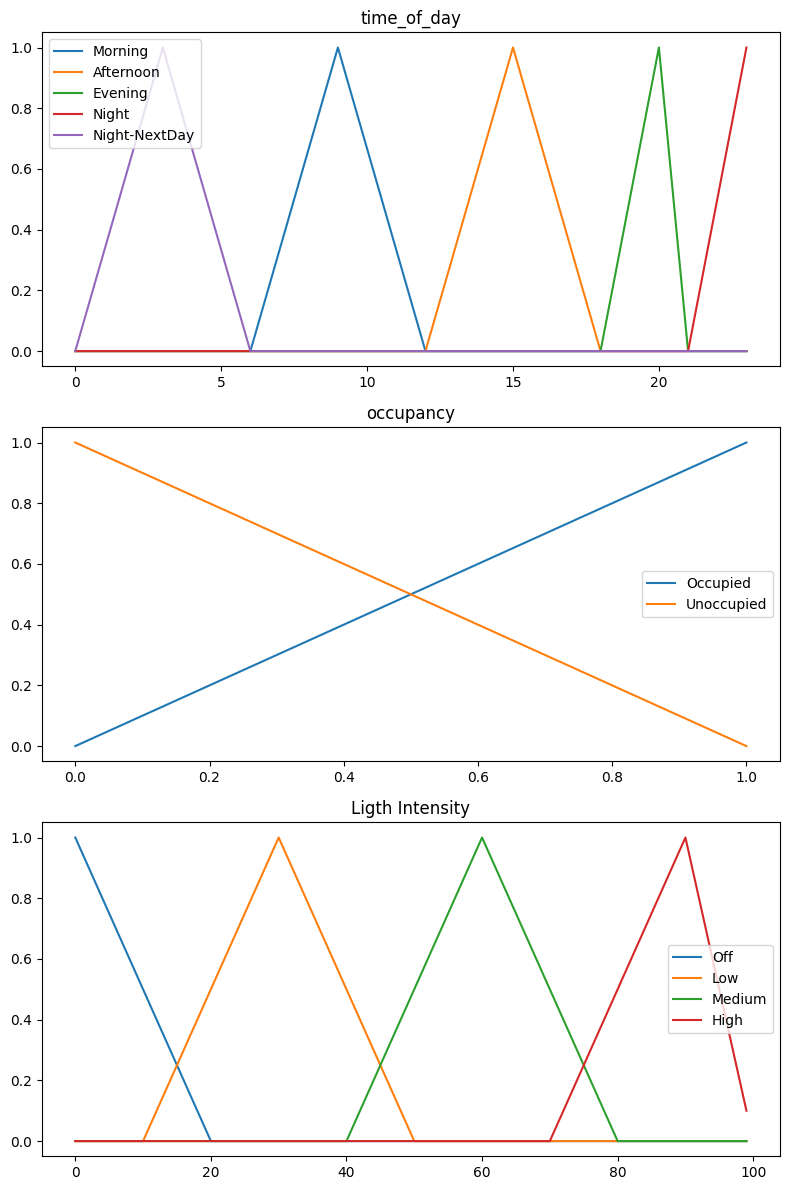

In [25]:
# Visualización de funciones de membresía
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(time_of_day.universe,time_of_day["Morning"].mf, label='Morning')
axes[0].plot(time_of_day.universe, time_of_day["Afternoon"].mf, label='Afternoon')
axes[0].plot(time_of_day.universe, time_of_day["Evening"].mf, label='Evening')
axes[0].plot(time_of_day.universe, time_of_day["Night"].mf, label='Night')
axes[0].plot(time_of_day.universe, time_of_day["Night-NextDay"].mf, label='Night-NextDay')
axes[0].set_title('time_of_day')
axes[0].legend()

axes[1].plot(occupancy.universe, occupancy["Occupied"].mf, label='Occupied')
axes[1].plot(occupancy.universe, occupancy["Unoccupied"].mf, label='Unoccupied')
axes[1].set_title('occupancy')
axes[1].legend()

axes[2].plot(lighting_intensity.universe, lighting_intensity['Off'].mf, label='Off')
axes[2].plot(lighting_intensity.universe, lighting_intensity['Low'].mf, label='Low')
axes[2].plot(lighting_intensity.universe, lighting_intensity['Medium'].mf, label='Medium')
axes[2].plot(lighting_intensity.universe, lighting_intensity['High'].mf, label='High')
axes[2].set_title('Ligth Intensity')
axes[2].legend()

plt.tight_layout()
plt.show()